# Chapter 2 - Harmonics and Waveforms

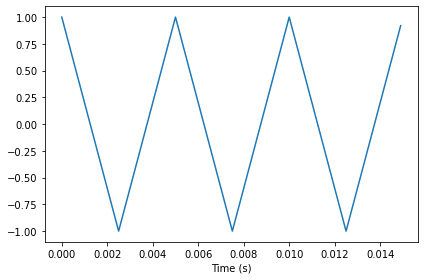

In [6]:
#Triangle Wave
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

In [2]:
#How does it sound?
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

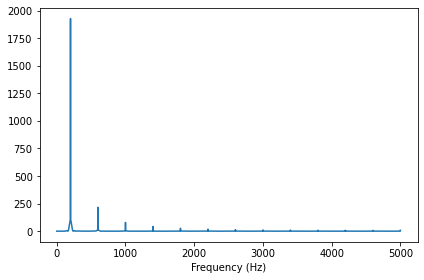

In [3]:
#What does the spectrum look like?
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

 - Fundamental Freq & Dominant freq = 200

## Square Signal

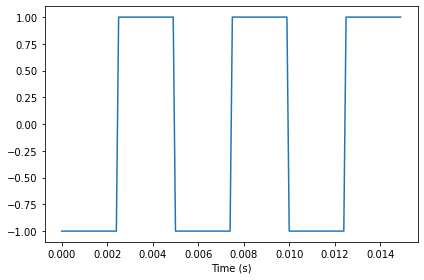

In [19]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

In [20]:
#How does it sound?
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

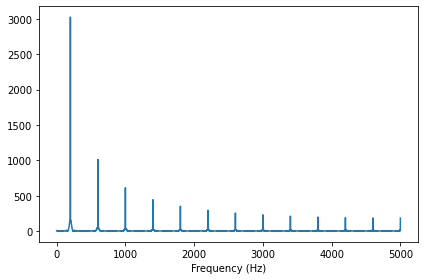

In [21]:
#What does the spectrum look like?
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Sawtooth Signal

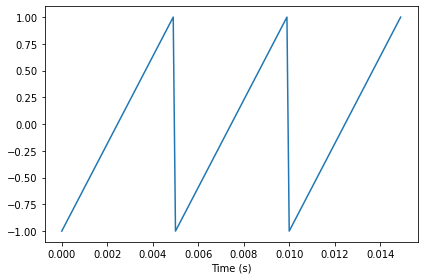

In [89]:
from thinkdsp import SawtoothSignal, decorate

signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

In [23]:
#how does it sound?
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

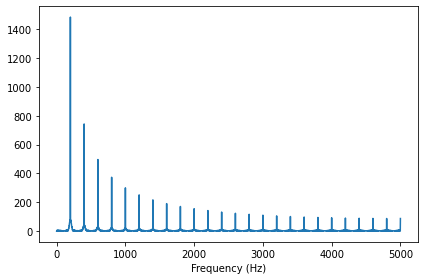

In [24]:
#What does the spectrum look like?
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Aliasing
Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

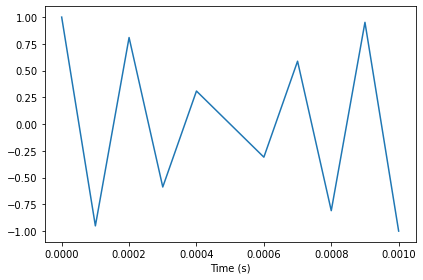

In [25]:
from ipywidgets import interact, fixed

wave = read_wave('92002__jcveliz__violin-origional.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

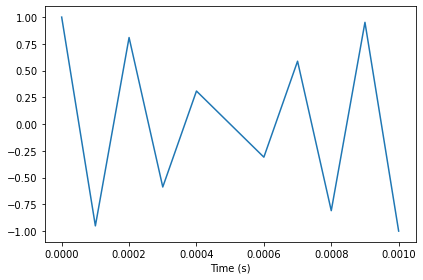

In [26]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

- With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.
<hr>
Make a triangle signal and plot the spectrum. See how the harmonics get folded.

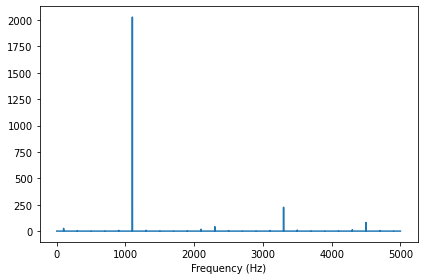

In [27]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Amplitude and phase
Make a sawtooth wave.

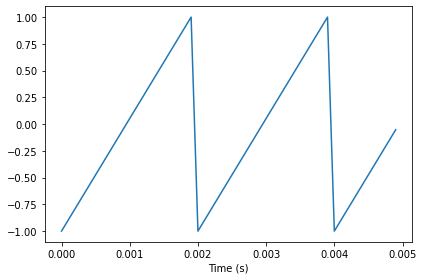

In [17]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

In [18]:
#PLay it
wave.make_audio()

In [19]:
#Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).
import numpy as np
hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

In [20]:
#Compute the frequencies that match up with the elements of the FFT.
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

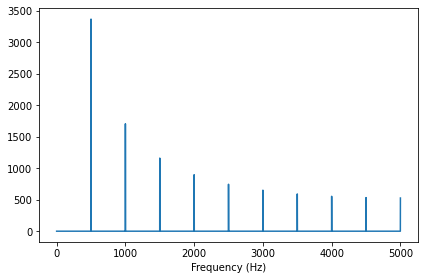

In [21]:
#Plot the magnitudes vs the frequencies.
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)')

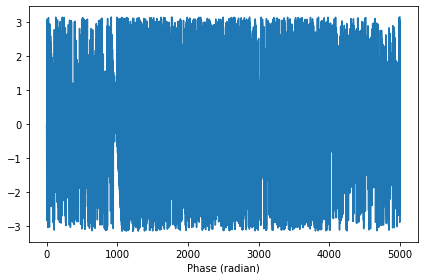

In [23]:
#Plot the phases vs the frequencies.
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

### What does phase sound like?


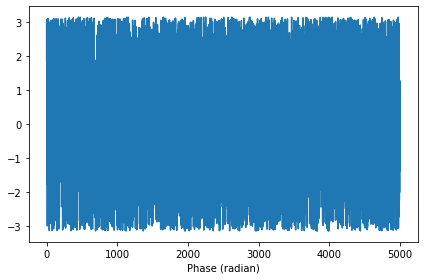

In [24]:
#Shuffle the phases.
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

In [25]:
#Put the shuffled phases back into the spectrum. 
#Each element in hs is a complex number with magitude A and phase ϕ, with which we can compute Aeiϕ
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

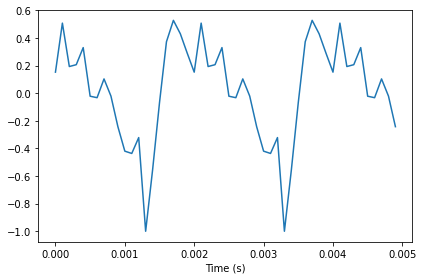

In [26]:
#Convert the spectrum back to a wave (which uses irfft).

wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

In [29]:
wave2.make_audio()

In [28]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes. They differ only in phase.


In [15]:
def view_harmonics(freq, framerate):
    """Plot the spectrum of a sawtooth signal.
    
    freq: frequency in Hz
    framerate: in frames/second
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='C0')
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
    display(wave.make_audio())

In [16]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

Exercise 1   A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave
Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

In [30]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):    
    def evaluate(self, ts):
        #Number of cycles since start time
        cycles = self.freq * ts + self.offset / np.pi / 2
        #np.modf splits num of cycles into the fraction part and int part (we use frac part only)
        frac, _ = np.modf(cycles)
        #unbias shifts waveform down so it centred at 0, normalise sclaes it to given amp
        ys = normalize(unbias(frac), self.amp)
        return ys

In [31]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

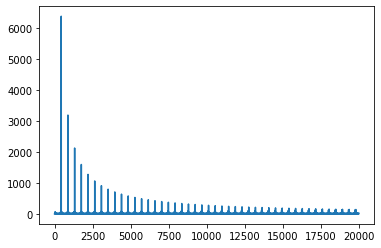

In [32]:
sawtooth.make_spectrum().plot()

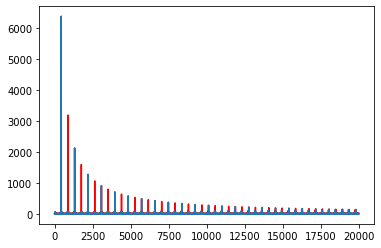

In [35]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='red')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()

Compared to a triangle wave, the sawtooth doesn't drop off as fast.

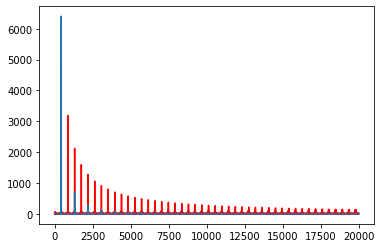

In [41]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='red')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()

Specifically, the harmonics of the triangle wave drop off in proportion to $1/f^2$, while the sawtooth drops off like $1/f$.

Exercise 2   Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

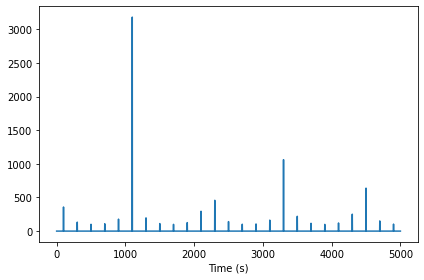

In [63]:
signal = SquareSignal(1100).make_wave(0.5, framerate=10000)
signal.make_spectrum().plot()
decorate(xlabel='Time (s)')

In [52]:
signal.make_audio()

In [62]:
from thinkdsp import SinSignal

SinSignal(100).make_wave(duration=0.5, framerate=10000).make_audio()

Exercise 3   If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean?
Try this experiment:

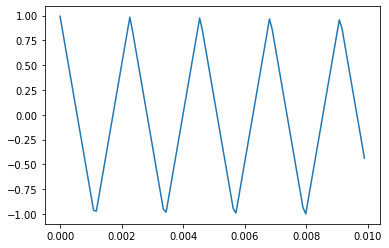

In [65]:
#Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform
triangle = TriangleSignal(440).make_wave(duration=0.01)
triangle.plot()

In [76]:
#Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component?
spectrum = triangle.make_spectrum()
print("Amp:", spectrum.hs[0].real)
print("Phase:",spectrum.hs[0].imag)

Amp: 1.0436096431476471e-14
Phase: 0.0


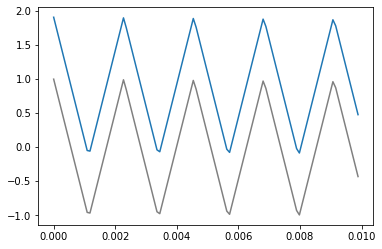

In [78]:
#Set spectrum.hs[0] = 100. Make a Wave from the modified Spectrum and plot it.
#What effect does this operation have on the waveform?
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

If we add to the zero-frequency component, it has the effect of adding a vertical offset to the wave.

The zero-frequency component is the total of all the values in the signal, as we'll see when we get into the details of the DFT. If the signal is unbiased, the zero-frequency component is 0. In the context of electrical signals, the zero-frequency term is called the DC offset; that is, a direct current offset added to an AC signal.

Exercise 5   Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0.
Test your function using a square, triangle, or sawtooth wave.

Compute the Spectrum and plot it.
Modify the Spectrum using your function and plot it again.
Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [80]:
def modify_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [81]:
wave = SawtoothSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

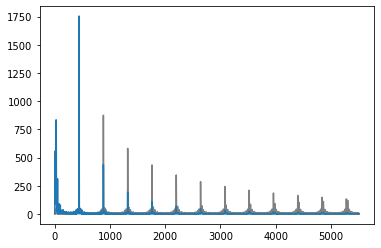

In [83]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
modify_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)

In [85]:
#acts like low_pass filter
filtered = spectrum.make_wave()
filtered.make_audio()

In [88]:
#almost sounds like sine wave
signal = SinSignal(440)
wave = signal.make_wave(duration=1, framerate=10000)
wave.make_audio()

In [96]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

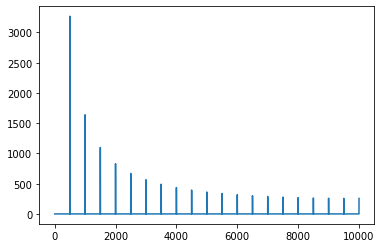

In [97]:
spectrum = wave.make_spectrum()
spectrum.plot()

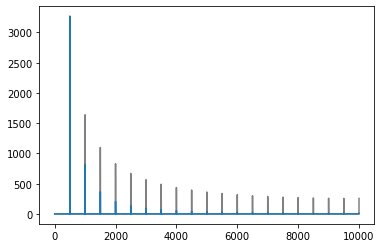

In [99]:
spectrum.plot(color='gray')
modify_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

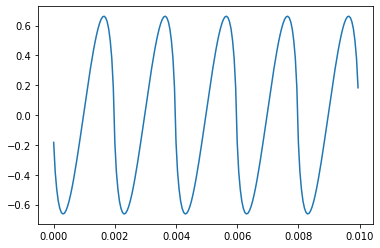

In [101]:
wave = spectrum.make_wave()
wave.segment(duration=0.01).plot()

In [102]:
from thinkdsp import ParabolicSignal

wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

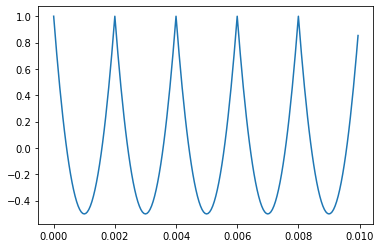

In [103]:
wave.segment(duration=0.01).plot()

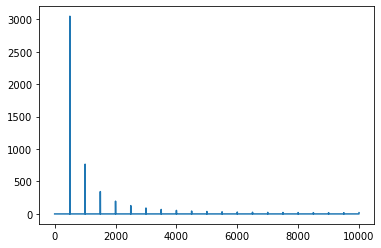

In [104]:
spectrum = wave.make_spectrum()
spectrum.plot()